In [1]:
import os
import re

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
os.getcwd()

'/home/anthony/420/notebooks'

In [3]:
def iris_filter(dir_name):
    if dir_name.startswith('dataset'):
        return dir_name.endswith('=iris')
    else:
        return True
    
def noise_0_filter(dir_name):
    if dir_name.startswith('gaussian_noise'):
        return dir_name.endswith('=0')
    else:
        return True
    
def noise_0_01_filter(dir_name):
    if dir_name.startswith('gaussian_noise'):
        return dir_name.endswith('=0.01')
    else:
        return True
    
def noise_0_1_filter(dir_name):
    if dir_name.startswith('gaussian_noise'):
        return dir_name.endswith('=0.1')
    else:
        return True

In [4]:
def get_summary_data(noise_filter):
    n_processed = 0
    output_array = np.array([])

    for path, dirs, files in os.walk('../results'):
        dirs[:] = list(filter(iris_filter, dirs))
        dirs[:] = list(filter(noise_filter, dirs))

        if len(dirs) == 0: # Leaf dir
            val_loss = np.load(path + '/val_loss.npy')

            if len(output_array) > 0:
                output_array = np.vstack([output_array, val_loss])    
            else:
                output_array = val_loss

            n_processed += 1

            print('\rProcessed %d items...' % n_processed, end='')

    print()
    
    output_array[(output_array == np.inf) | (output_array == -np.inf)] = np.nan
    
    summaries = dict()
    
    lower_quartile, median, upper_quartile = np.nanpercentile(output_array, [25, 50, 75], axis=0)
    
    summaries['median'] = median
    summaries['quartiles'] = {
        'lower': lower_quartile,
        'upper': upper_quartile
    }
    
    output_array = np.ma.masked_invalid(output_array)
    summaries['min'] = output_array.min(axis=0)
    summaries['max'] = output_array.max(axis=0)
    
    summaries['mean'] = output_array.mean(axis=0)
    summaries['std'] = output_array.std(axis=0)
    
    return summaries

In [5]:
noise_val_loss = dict()

In [6]:
%%time

noise_val_loss['0'] = get_summary_data(noise_0_filter)
noise_val_loss['0.01'] = get_summary_data(noise_0_01_filter)
noise_val_loss['0.1'] = get_summary_data(noise_0_1_filter)

Processed 432 items...
Processed 432 items...
Processed 432 items...
CPU times: user 16min 46s, sys: 8min 47s, total: 25min 34s
Wall time: 5min 10s


In [7]:
noise_val_loss['0']

{'median': array([1.11591467, 1.08208798, 1.05147066, ..., 0.28455638, 0.28455353,
        0.28455068]),
 'quartiles': {'lower': array([0.68028997, 0.61813384, 0.57169415, ..., 0.14934902, 0.14934753,
         0.14934604]),
  'upper': array([1.35002973, 1.28738152, 1.24792592, ..., 0.36094607, 0.36091851,
         0.36088554])},
 'min': masked_array(data=[0.22799438876295328, 0.05279949036531909,
                    0.11964493365160145, ..., 0.026519089786054374,
                    0.02651878020601559, 0.026518470715571108],
              mask=[False, False, False, ..., False, False, False],
        fill_value=1e+20),
 'max': masked_array(data=[34.383646960594966, 1.3537150983662278e+16,
                    5.03623949471246e+68, ..., 1.1238183258199128,
                    1.1238161405469909, 1.1238139554408546],
              mask=[False, False, False, ..., False, False, False],
        fill_value=1e+20),
 'mean': masked_array(data=[1.1690744658839824, 786860670989.0496,
            

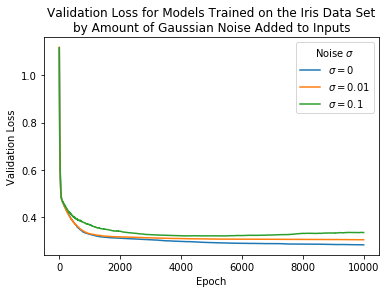

In [24]:
for noise_std in noise_val_loss.keys():
    y = noise_val_loss[noise_std]['median']       
    plt.plot(y, label='$\sigma=%s$' % noise_std)

plt.title('Validation Loss for Models Trained on the Iris Data Set\nby Amount of Gaussian Noise Added to Inputs')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend(title='Noise $\sigma$')

plt.savefig('plots/validation_loss_by_amount_of_gaussian_noise.png', bbox_inches='tight')